# Spatial Hotspot

Spatial hotspot is a tool for identifying informative genes or gene modules in a single-cell dataset. Importantly, 'informative' here is defined based on how well a gene’s variation agrees with certain cell metric - some similarity mapping between cells.

Genes which are informative are those whose expression varies in similar way among cells which are nearby in the given metric.

## Analysis and Plot

Please download our **[example data](http://116.6.21.110:8090/share/dd965cba-7c1f-40b2-a275-0150890e005f)** beforehand.

In [ ]:
import warnings

warnings.filterwarnings('ignore')
import stereo as st

data_path = './SS200000135TL_D1.tissue.gef'

# read the GEF file information
st.io.read_gef_info(data_path)

# read the GEF file
data = st.io.read_gef(file_path=data_path, bin_size=50)

# Preprocessing
data.tl.cal_qc()

#Filtering
data.tl.filter_cells(min_gene=200, min_n_genes_by_counts=3, max_n_genes_by_counts=2500, pct_counts_mt=5, inplace=True)

#Normalization
data.tl.raw_checkpoint()
data.tl.raw
#data.tl.sctransform(res_key='sctransform', n_genes=2000, filter_hvgs=False, inplace=True)
data.tl.normalize_total(target_sum=10000)
data.tl.log1p()

#Highly variable genes
data.tl.highly_variable_genes(min_mean=0.0125, max_mean=3,min_disp=0.5, n_top_genes=2000, res_key='highly_variable_genes')
data.tl.scale()

#  analysis of spatial hotspot
data.tl.spatial_hotspot(
                    use_highly_genes=True, 
                    use_raw=True, 
                    hvg_res_key='highly_variable_genes',
                    model='normal', 
                    n_neighbors=30,
                    n_jobs=20, 
                    fdr_threshold=0.05, 
                    min_gene_threshold=10,
                    res_key='spatial_hotspot',
                    )

A convenient method is supplied to plot the results of `hotspot.create_modules`.

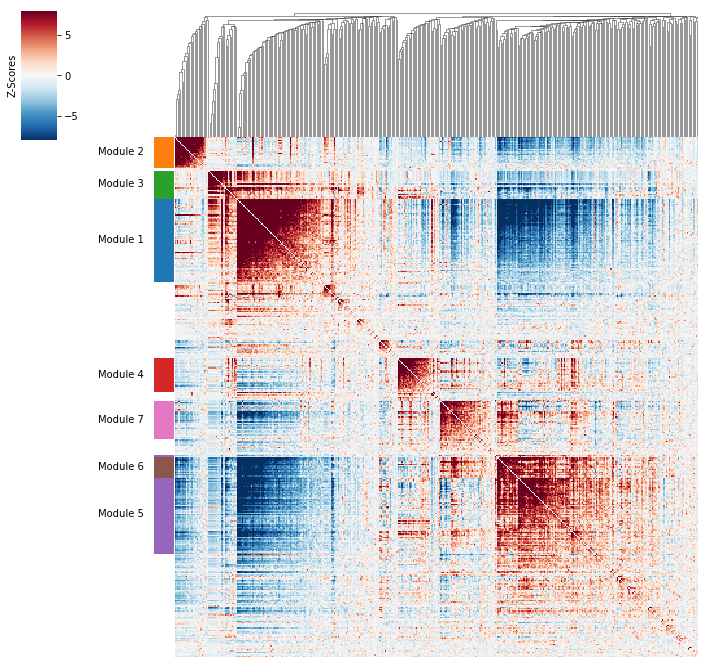

In [7]:
data.plt.hotspot_local_correlations()

Here we could visualize module scores with spatial position.

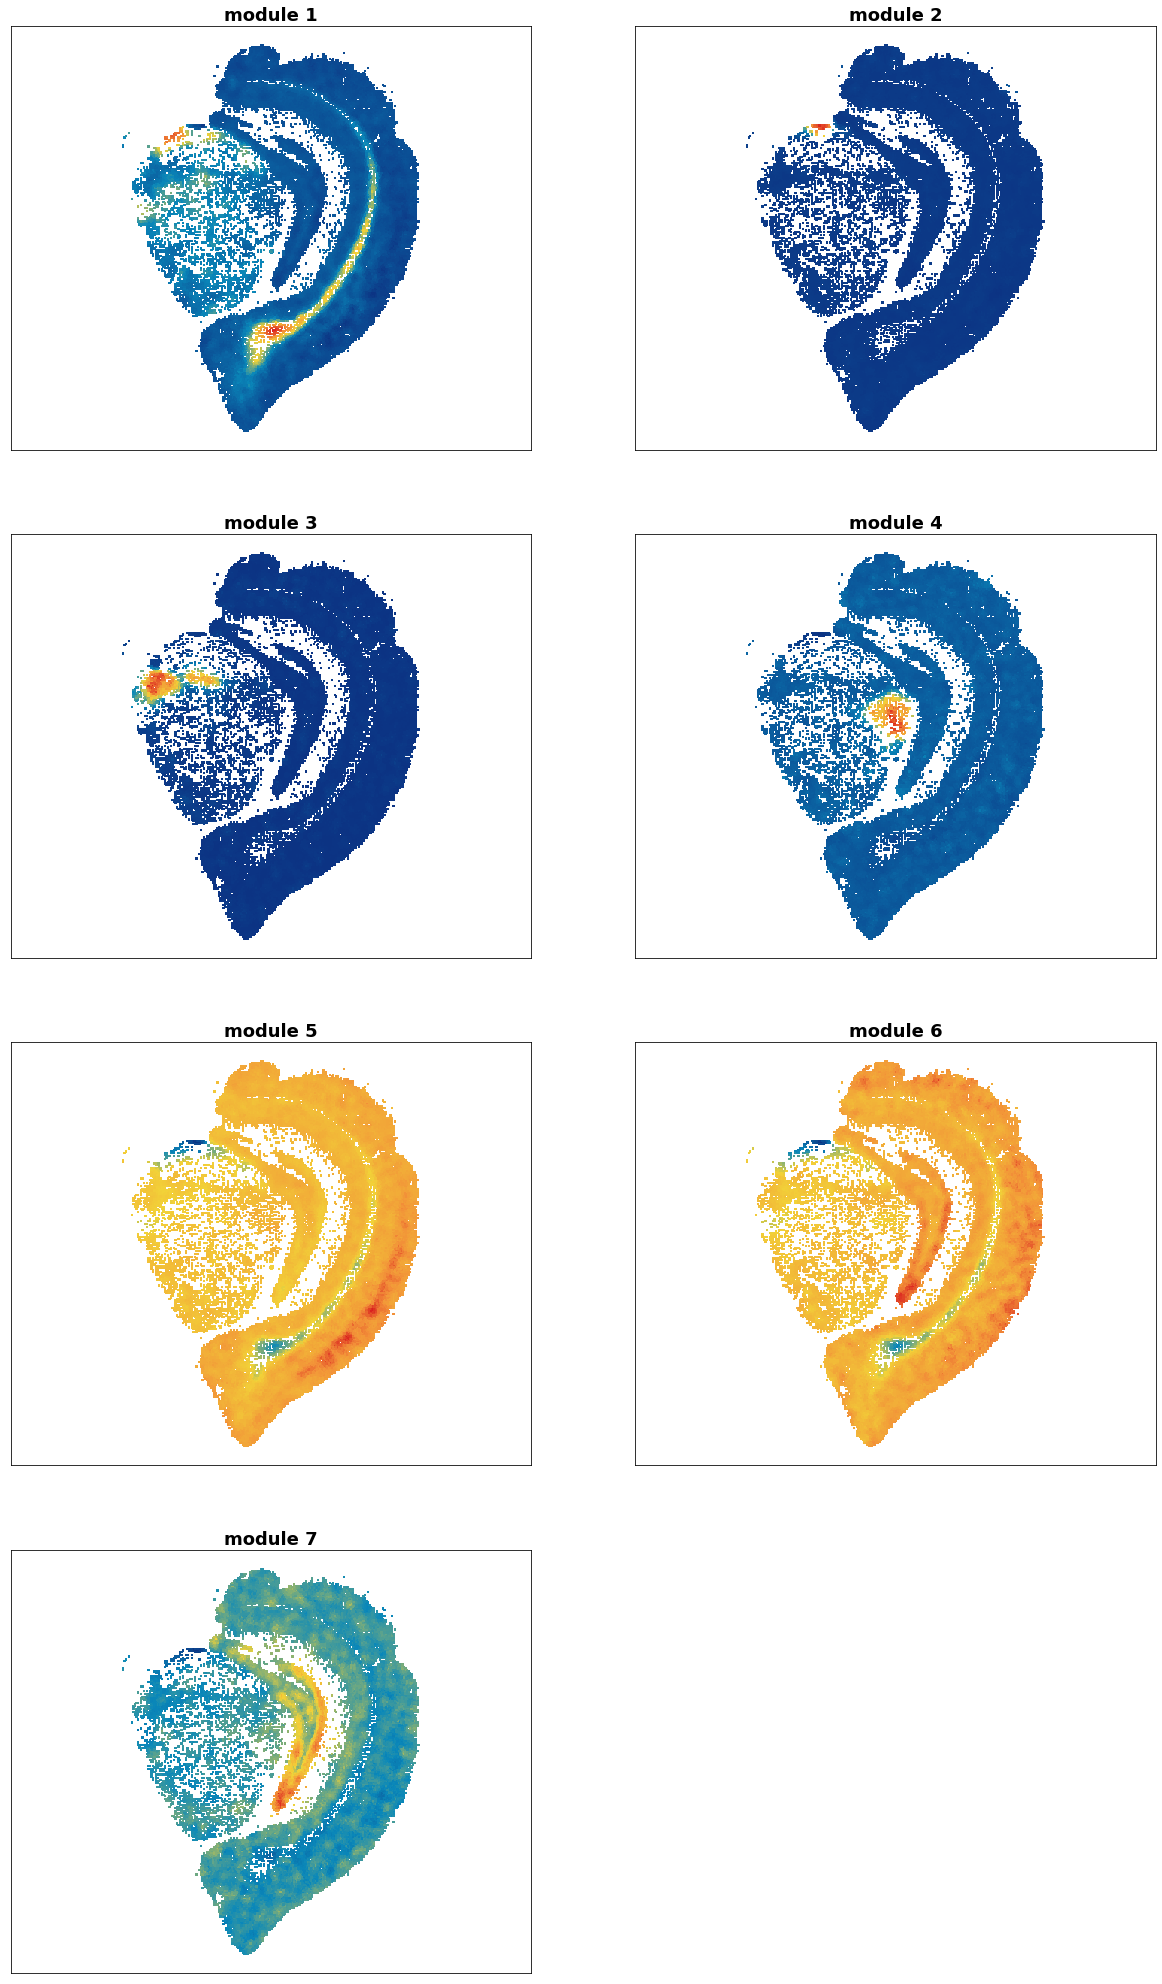

In [8]:
data.plt.hotspot_modules()

## Performance

The example data contains 35890 cells (bins) and 20816 genes. 

Machine configuration as below:

|physical cores |logic cores |memory   |
|---------------|------------|---------|
|12             |48          |250G     |

This module only supports single process.

|process  |memory(max) |cpu    |time   |
|---------|------------|-------|-------|
|1        |4.25G       |2670%  |2m26s  |